# SIM - Phase portraits (Fig. S2C right)

## Define functions

In [1]:
import os
import sys
import glob
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import celldancer as cd
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
import random
seed = 0
random.seed(seed)
np.random.seed(seed)

def process_scv_result(scv_result): # change variable name
    splice_unsplice_splice_predict_unsplice_predict_dynamic=scv_result[['gene_name','dynamic_splice','dynamic_unsplice','dynamic_splice_predict','dynamic_unsplice_predict']]
    splice_unsplice_splice_predict_unsplice_predict_static=scv_result[['gene_name','static_splice','static_unsplice','static_splice_predict','static_unsplice_predict']]
    splice_unsplice_splice_predict_unsplice_predict_dynamic=splice_unsplice_splice_predict_unsplice_predict_dynamic.rename(columns={'gene_name': 'gene_name', 'dynamic_splice': 'splice', 'dynamic_unsplice': 'unsplice', 'dynamic_splice_predict': 'splice_predict', 'dynamic_unsplice_predict': 'unsplice_predict'})
    splice_unsplice_splice_predict_unsplice_predict_static=splice_unsplice_splice_predict_unsplice_predict_static.rename(columns={'gene_name': 'gene_name', 'static_splice': 'splice', 'static_unsplice': 'unsplice', 'static_splice_predict': 'splice_predict', 'static_unsplice_predict': 'unsplice_predict'})

    splice_unsplice_splice_predict_unsplice_predict_dynamic.splice_predict=splice_unsplice_splice_predict_unsplice_predict_dynamic.splice+splice_unsplice_splice_predict_unsplice_predict_dynamic.splice_predict
    splice_unsplice_splice_predict_unsplice_predict_dynamic.unsplice_predict=splice_unsplice_splice_predict_unsplice_predict_dynamic.unsplice+splice_unsplice_splice_predict_unsplice_predict_dynamic.unsplice_predict

    splice_unsplice_splice_predict_unsplice_predict_static.splice_predict=splice_unsplice_splice_predict_unsplice_predict_static.splice+splice_unsplice_splice_predict_unsplice_predict_static.splice_predict
    splice_unsplice_splice_predict_unsplice_predict_static.unsplice_predict=splice_unsplice_splice_predict_unsplice_predict_static.unsplice+splice_unsplice_splice_predict_unsplice_predict_static.unsplice_predict
    return (splice_unsplice_splice_predict_unsplice_predict_static,splice_unsplice_splice_predict_unsplice_predict_dynamic)
    
def log_scale(df1, df2, c, b):
    df = (df1**2+df2**2)**0.5
    df2 = np.log(c+np.abs(df))/np.log(b)
    return df2

def transform_dist_x_y(df_dist, df1, df2):
    df = (df1**2+df2**2)**0.5
    scale = df_dist/df
    df2_t = df2*scale
    df1_t = df1*scale
    return df1_t, df2_t


def plt_method(load_pred_result,gene_list,save_fig_path,type_choice,custom_xlim=None,custom_ylim=None):# change variable name

    load_pred_result=load_pred_result[load_pred_result.gene_name.isin(gene_list)]

    ncols=4
    height=math.ceil(len(gene_list)/5)*4
    fig = plt.figure(figsize=(20,height))

    for i in range(len(gene_list)):
        ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
        # scatter_gene(
        cdplt.scatter_gene(
            ax=ax,
            x='splice',
            y='unsplice',
            cellDancer_df=load_pred_result,
            custom_xlim=custom_xlim,
            custom_ylim=custom_ylim,
            colors=None,
            alpha=0.1,
            s = 100,
            velocity=True,
            gene=gene_list[i],
            arrow_grid=(10,10))

        ax.set_title(gene_list[i]+type_choice)
        ax.axis('off')
        plt.savefig(save_fig_path+type_choice+'_'+gene_list[i]+'.PDF')
    plt.show()
    
def get_loged_v_df(load_pred_result, c, base):
    load_pred_result.loc[:,'s_velocity']=load_pred_result.splice_predict-load_pred_result.splice
    load_pred_result.loc[:,'u_velocity']=load_pred_result.unsplice_predict-load_pred_result.unsplice
    log_dist = log_scale(load_pred_result.loc[:,'s_velocity'], load_pred_result.loc[:,'u_velocity'], c=c, b=base)
    df_s_velocity_t, df_u_velocity_t = transform_dist_x_y(log_dist, load_pred_result.loc[:,'s_velocity'], load_pred_result.loc[:,'u_velocity'])
    load_pred_result.loc[:,'dist']= log_dist
    load_pred_result.loc[:,'s_velocity_log']= load_pred_result.splice+ df_s_velocity_t
    load_pred_result.loc[:,'u_velocity_log']= load_pred_result.unsplice+ df_u_velocity_t
    # print(load_pred_result)
    return(load_pred_result)

## Boosting

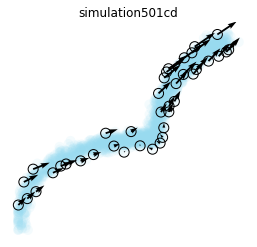

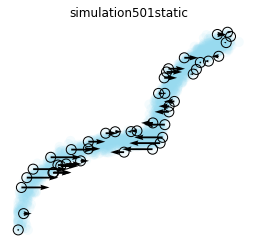

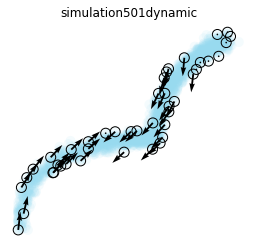

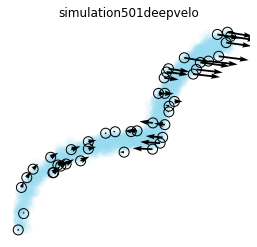

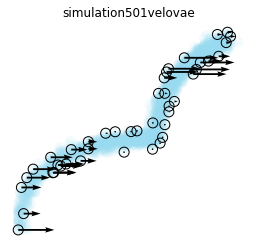

In [2]:
ratio_list=['1']
gene_list=['simulation501']
custom_xlim=(None,None)
custom_ylim=(None,None)

for ratio in ratio_list:
    type_list=['cd','static','dynamic','deepvelo','velovae']
    save_fig_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/gene_velocity_compar/'

    load_pred_result_cd=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/celldancer/ratio'+ratio+'/celldancer_estimation.csv')
    load_pred_result_dv=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/DeepVelo/trans_boost_'+ratio+'.csv',)
    load_pred_result_vae=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/VeloVAE_default/trans_boost_'+ratio+'.csv')
    scv_result=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/wing_path/velocity_result/scv/scvelo_result_wing_path__splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df_'+ratio+'.csv')    

    load_pred_result_static,load_pred_result_dynamic = process_scv_result(scv_result)
    
    df_list=[load_pred_result_cd,
             load_pred_result_static,
             load_pred_result_dynamic,
            load_pred_result_dv,
             load_pred_result_vae]
    
    for load_pred_result,type_choice in zip(df_list,type_list):
        plt_method(load_pred_result,gene_list,save_fig_path,type_choice,custom_xlim=custom_xlim,custom_ylim=custom_ylim)

# Multi-forward

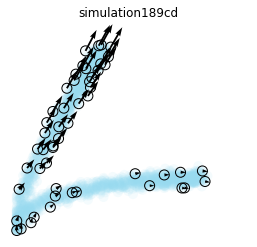

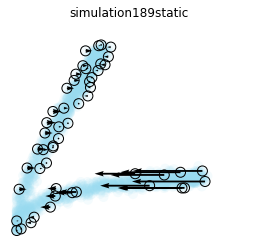

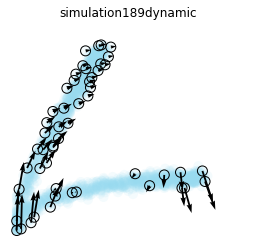

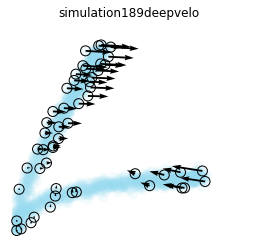

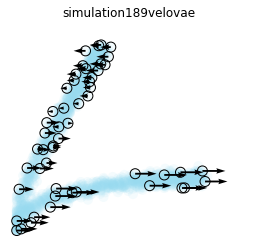

In [3]:
ratio_list=['1']
# gene_list=['simulation445']
# gene_list=['simulation663']
# gene_list=['simulation189','simulation857']
gene_list=['simulation189']
custom_xlim=(None,3)
custom_ylim=(None,6.5)

for ratio in ratio_list:
    type_list=['cd','static','dynamic','deepvelo','velovae']
    save_fig_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path/gene_velocity_compar/'

    load_pred_result_cd=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path/velocity_result/celldancer/ratio'+ratio+'/celldancer_estimation.csv')
    load_pred_result_dv=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path/velocity_result/DeepVelo/multi_forward_'+ratio+'.csv',)
    load_pred_result_vae=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path/velocity_result/VeloVAE_default/multi_forward_'+ratio+'.csv')
    scv_result=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/multi_path/velocity_result/scv/scvelo_result_multi_path__splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df_'+ratio+'.csv')    

    load_pred_result_cd=get_loged_v_df(load_pred_result_cd, c=1.2, base=2)
    load_pred_result_cd.loc[:,'unsplice_predict']=load_pred_result_cd.u_velocity_log
    load_pred_result_cd.loc[:,'splice_predict']=load_pred_result_cd.s_velocity_log
    
    load_pred_result_static,load_pred_result_dynamic = process_scv_result(scv_result)
    
    # load_pred_result_static = get_loged_v_df(load_pred_result_static, c=c, base=2)
    # load_pred_result_static.loc[:,'unsplice_predict']=load_pred_result_static.u_velocity_log
    # load_pred_result_static.loc[:,'splice_predict']=load_pred_result_static.s_velocity_log
    
    # load_pred_result_dynamic = get_loged_v_df(load_pred_result_dynamic, c=c, base=2)
    # load_pred_result_dynamic.loc[:,'unsplice_predict']=load_pred_result_dynamic.u_velocity_log
    # load_pred_result_dynamic.loc[:,'splice_predict']=load_pred_result_dynamic.s_velocity_log
    
    # load_pred_result_dv = get_loged_v_df(load_pred_result_dv, c=c, base=2)
    # load_pred_result_dv.loc[:,'unsplice_predict']=load_pred_result_dv.u_velocity_log
    # load_pred_result_dv.loc[:,'splice_predict']=load_pred_result_dv.s_velocity_log
    
    load_pred_result_vae = get_loged_v_df(load_pred_result_vae, c=1.2, base=2)
    load_pred_result_vae.loc[:,'unsplice_predict']=load_pred_result_vae.u_velocity_log
    load_pred_result_vae.loc[:,'splice_predict']=load_pred_result_vae.s_velocity_log
        
    df_list=[load_pred_result_cd,
             load_pred_result_static,
             load_pred_result_dynamic,
            load_pred_result_dv,
             load_pred_result_vae]
    
    for load_pred_result,type_choice in zip(df_list,type_list):
        plt_method(load_pred_result,gene_list,save_fig_path,type_choice,custom_xlim=custom_xlim,custom_ylim=custom_ylim)

# Multi-backward

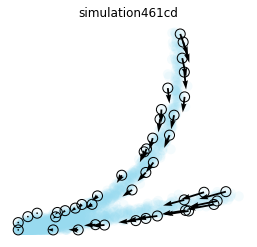

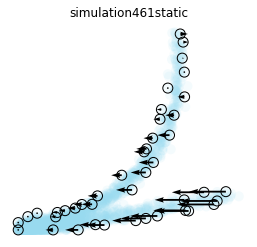

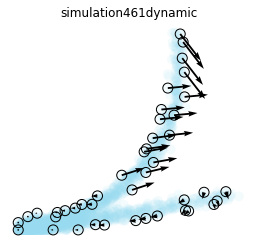

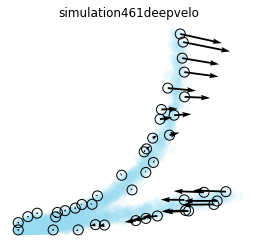

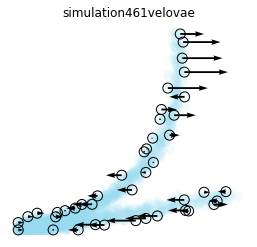

In [4]:
ratio_list=['1']
gene_list=['simulation461']
custom_xlim=(None,None)
custom_ylim=(None,None)

for ratio in ratio_list:
    type_list=['cd','static','dynamic','deepvelo','velovae']
    save_fig_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/gene_velocity_compar/'

    load_pred_result_cd=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/celldancer/ratio'+ratio+'/celldancer_estimation.csv')
    load_pred_result_dv=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/DeepVelo/multi_backward_'+ratio+'.csv',)
    load_pred_result_vae=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/VeloVAE_default/multi_backward_'+ratio+'.csv')
    scv_result=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/simulation/data0606_for_publication/back_path/velocity_result/scv/scvelo_result_back_path__splice_unsplice_splice_predict_unsplice_predict_dynamic_and_steady_df_'+ratio+'.csv')    

    load_pred_result_static,load_pred_result_dynamic = process_scv_result(scv_result)
    
    df_list=[load_pred_result_cd,
             load_pred_result_static,
             load_pred_result_dynamic,
            load_pred_result_dv,
             load_pred_result_vae]
    
    for load_pred_result,type_choice in zip(df_list,type_list):
        plt_method(load_pred_result,gene_list,save_fig_path,type_choice,custom_xlim=custom_xlim,custom_ylim=custom_ylim)